In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv("1.ushape.csv",header=None)

In [10]:
data.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [11]:
data.shape

(100, 3)

In [12]:
data[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

Balanced data

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [182]:
data[[0,1]]

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321
...,...,...
95,1.699453,0.587720
96,0.218623,-0.652521
97,0.952914,-0.419766
98,-1.318500,0.423112


C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

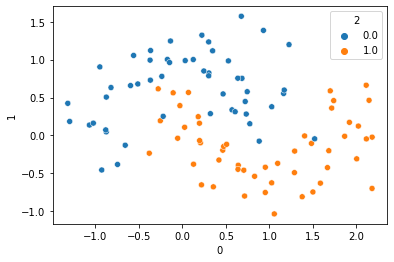

In [183]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [91]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Rescaling X test and X_train

In [92]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)
pd.DataFrame(x_trainf).head()

,0,1
0,-1.545278,0.606284
1,0.464310,-0.557112
2,1.172940,-0.605503
3,-1.608566,0.399034
4,1.192585,-1.660364


# Sigmoid Activation Fn sgd optimizer

In [93]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(4,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 9         
                                                                 
 dense_19 (Dense)            (None, 4)                 16        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


#We are using Stochastic Gradient Descent
And output variable is binary, so we use Binary_cross entropy loss fn.

In [95]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [96]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=10,validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 48ms/step - loss: 0.7295 - accuracy: 0.4688 - val_loss: 0.7060 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.7266 - accuracy: 0.4688 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.7240 - accuracy: 0.4688 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7221 - accuracy: 0.4688 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7193 - accuracy: 0.4688 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7170 - accuracy: 0.4688 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7155 - accuracy: 0.4688 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 8/10
7/7 [===========

In [97]:
y_pred=model.predict(x_testf)

if y_pred is greater than 0.5 we make it 1 else 0

In [98]:
y_predf=np.where(y_pred>0.5,1,0)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.6

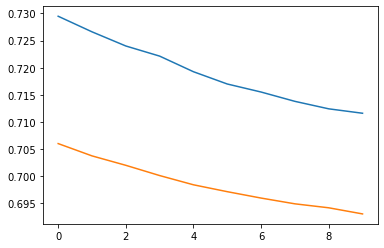

In [100]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [153]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [154]:
import mlxtend

In [28]:
from mlxtend.plotting import plot_decision_regions

C:\Users\kusumitha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

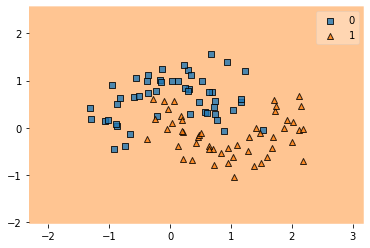

In [101]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

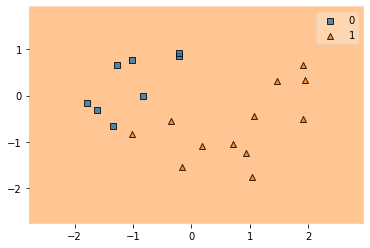

In [102]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Sigmoid Fn with optimizer adam

In [59]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(4,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 9         
                                                                 
 dense_13 (Dense)            (None, 4)                 16        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [62]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 49ms/step - loss: 0.7026 - accuracy: 0.4844 - val_loss: 0.6435 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6989 - accuracy: 0.4844 - val_loss: 0.6430 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.4844 - val_loss: 0.6426 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.4844 - val_loss: 0.6422 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.4844 - val_loss: 0.6420 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6844 - accuracy: 0.4844 - val_loss: 0.6419 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.4844 - val_loss: 0.6417 - val_accuracy: 0.6250
Epoch 8/20
7/7 [===========

In [63]:
y_pred=model.predict(x_testf)

In [64]:
y_predf=np.where(y_pred>0.5,1,0)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.65

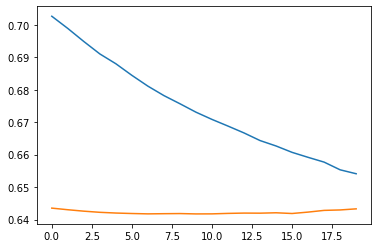

In [66]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

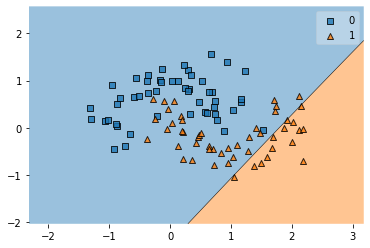

In [67]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

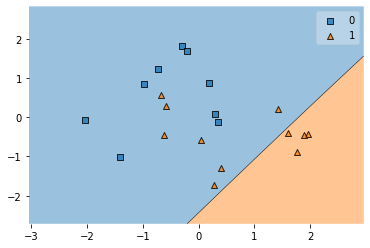

In [68]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with sgd optimizer

In [157]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [158]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 3)                 9         
                                                                 
 dense_34 (Dense)            (None, 4)                 16        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [160]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=10,validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 1s 48ms/step - loss: 0.5904 - accuracy: 0.8125 - val_loss: 0.6224 - val_accuracy: 0.6875
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5841 - accuracy: 0.8125 - val_loss: 0.6189 - val_accuracy: 0.6875
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5778 - accuracy: 0.8281 - val_loss: 0.6150 - val_accuracy: 0.6875
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5714 - accuracy: 0.8281 - val_loss: 0.6112 - val_accuracy: 0.6875
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5651 - accuracy: 0.8281 - val_loss: 0.6078 - val_accuracy: 0.6875
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5597 - accuracy: 0.8281 - val_loss: 0.6042 - val_accuracy: 0.6875
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5538 - accuracy: 0.8438 - val_loss: 0.6007 - val_accuracy: 0.6875
Epoch 8/10
7/7 [===========

In [161]:
y_pred=model.predict(x_testf)

In [162]:
y_predf=np.where(y_pred>0.5,1,0)

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.95

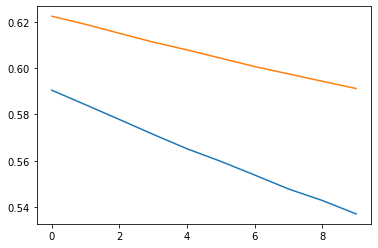

In [164]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

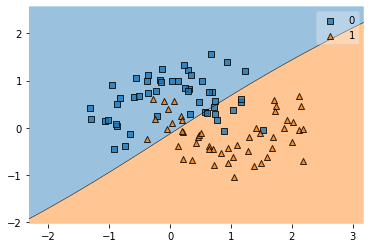

In [165]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

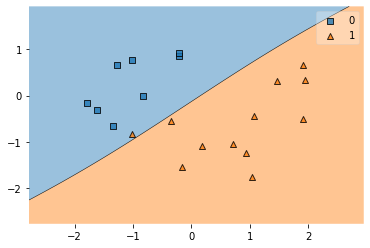

In [166]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with adam optimizer

In [167]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [168]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 9         
                                                                 
 dense_37 (Dense)            (None, 4)                 16        
                                                                 
 dense_38 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [170]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 49ms/step - loss: 0.6973 - accuracy: 0.3594 - val_loss: 0.7228 - val_accuracy: 0.2500
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.3750 - val_loss: 0.7188 - val_accuracy: 0.2500
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.4062 - val_loss: 0.7149 - val_accuracy: 0.3125
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.6856 - accuracy: 0.4062 - val_loss: 0.7108 - val_accuracy: 0.3125
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.4062 - val_loss: 0.7066 - val_accuracy: 0.3750
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.4375 - val_loss: 0.7026 - val_accuracy: 0.3750
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.4844 - val_loss: 0.6984 - val_accuracy: 0.3750
Epoch 8/20
7/7 [===========

In [171]:
y_pred=model.predict(x_testf)

In [172]:
y_predf=np.where(y_pred>0.5,1,0)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.9

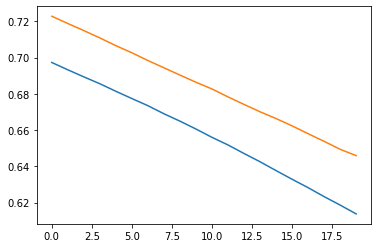

In [174]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

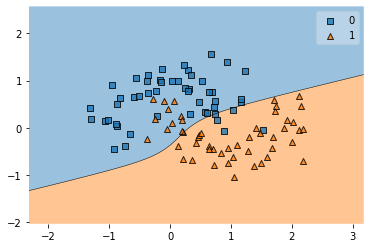

In [175]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

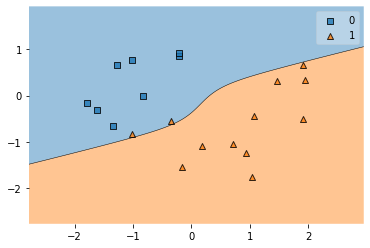

In [176]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with sgd optimizer

In [184]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [185]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 3)                 9         
                                                                 
 dense_43 (Dense)            (None, 4)                 16        
                                                                 
 dense_44 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [186]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [187]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 1s 47ms/step - loss: 0.6511 - accuracy: 0.7031 - val_loss: 0.6551 - val_accuracy: 0.8125
Epoch 2/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6463 - accuracy: 0.8438 - val_loss: 0.6518 - val_accuracy: 0.8125
Epoch 3/30
7/7 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.8281 - val_loss: 0.6485 - val_accuracy: 0.8125
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 0.6367 - accuracy: 0.8281 - val_loss: 0.6459 - val_accuracy: 0.8125
Epoch 5/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6326 - accuracy: 0.8281 - val_loss: 0.6433 - val_accuracy: 0.8125
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6286 - accuracy: 0.8281 - val_loss: 0.6402 - val_accuracy: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6236 - accuracy: 0.8281 - val_loss: 0.6375 - val_accuracy: 0.8125
Epoch 8/30
7/7 [===========

In [188]:
y_pred=model.predict(x_testf)

In [189]:
y_predf=np.where(y_pred>0.5,1,0)

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.75

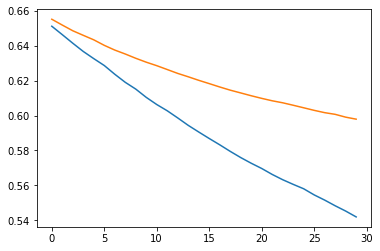

In [191]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

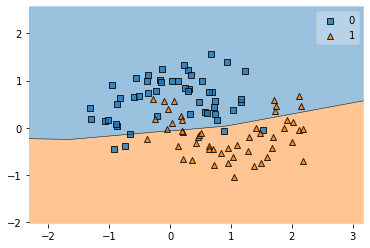

In [193]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

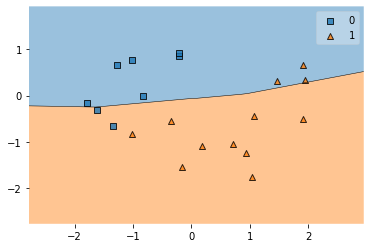

In [192]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with adam optimizer

In [205]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [206]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 3)                 9         
                                                                 
 dense_49 (Dense)            (None, 4)                 16        
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [208]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 76ms/step - loss: 0.6375 - accuracy: 0.5781 - val_loss: 0.7004 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6351 - accuracy: 0.6250 - val_loss: 0.6997 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6325 - accuracy: 0.6250 - val_loss: 0.6991 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.6302 - accuracy: 0.6562 - val_loss: 0.6984 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6275 - accuracy: 0.6562 - val_loss: 0.6976 - val_accuracy: 0.6875
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6248 - accuracy: 0.6562 - val_loss: 0.6966 - val_accuracy: 0.6875
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6221 - accuracy: 0.6562 - val_loss: 0.6959 - val_accuracy: 0.6875
Epoch 8/20
7/7 [===========

In [209]:
y_pred=model.predict(x_testf)

In [210]:
y_predf=np.where(y_pred>0.5,1,0)

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.85

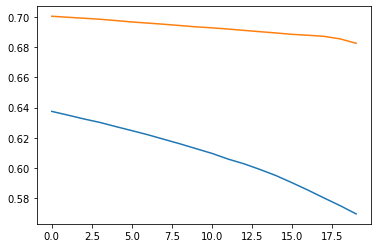

In [212]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

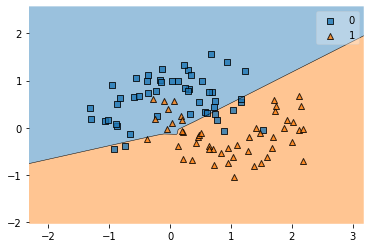

In [156]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

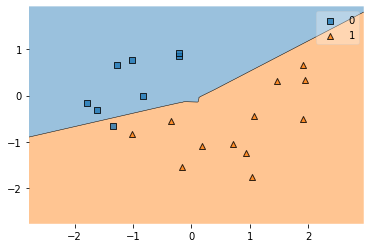

In [155]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Conclusion

### For this Dataset "ushape" Tanh Activation Function with sgd optimizer is working well 